In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

***1.load in data***

In [6]:
#load in data 
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')

In [7]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


***2.understanding data***

df.shape

In [8]:
df['work_year'].value_counts()


2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

**experience_level**

SE: Senior-Level

MI: Mid-Level

EN: Entry-Level

EX: Executive-Level

In [9]:
df['experience_level'].value_counts()


SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [10]:
ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Experience Level')
fig.show()

**employment_type**

FT: Full-Time
PT: Part-Time
CT: Contractual
FL: Freelancer

In [11]:
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [12]:
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [13]:
ex_level = df['job_title'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'job_title ')
fig.show()

In [14]:
df['salary'].value_counts()

100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: salary, Length: 815, dtype: int64

In [15]:
df['salary_currency'].value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [16]:
df['employee_residence'].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [17]:
df['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [18]:
df['company_size'].value_counts()


M    3153
L     454
S     148
Name: company_size, dtype: int64

In [19]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [20]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

4 numeric column

7 categorical column

***2. Data Preprocessing***

In [21]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [22]:
df.duplicated().sum()

1171

In [23]:
df =df.drop_duplicates(keep="first")

## 3.Insights and visualization

### 1.salary based on jobs

In [24]:
df['salary_in_usd'].groupby(df['job_title']) .mean()

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               150151.747253
                                     ...      
Research Engineer                165909.393939
Research Scientist               153486.369231
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

In [25]:
jobs = df[df['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()

In [26]:
jobs

,index,job_title
0,Data Engineer,269
1,Data Scientist,223
2,Data Analyst,195
3,Machine Learning Engineer,103
4,Analytics Engineer,41
5,Research Scientist,38
6,Data Architect,31
7,Research Engineer,28
8,Applied Scientist,20
9,Data Manager,18


Data engineer,Data Scientist and Data Analyst are top 3 job designations in industry

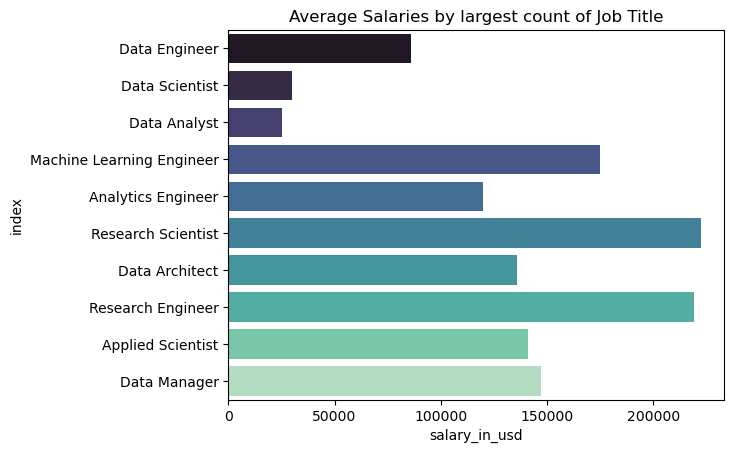

In [27]:
fig, ax = plt.subplots()
ax.set_title('Average Salaries by largest count of Job Title')
ax = sns.barplot(ax = ax, data = jobs , y = jobs['index'], x = df['salary_in_usd'],palette='mako')


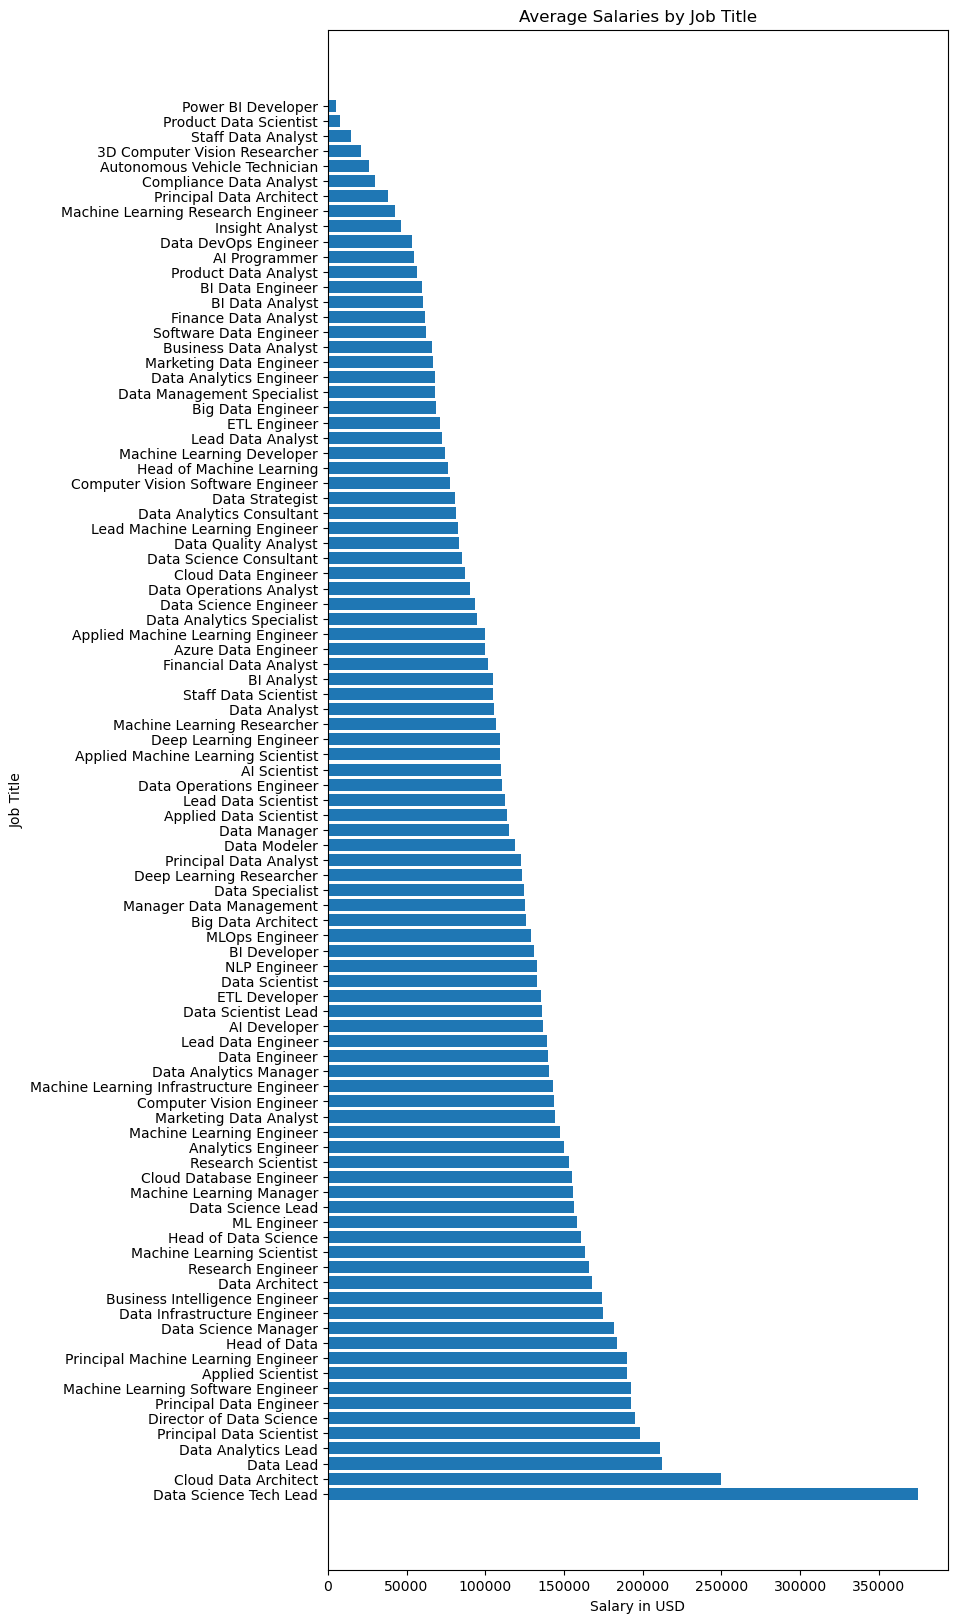

In [28]:
import matplotlib.pyplot as plt

# Calculate mean salaries for each job title
job_title_salaries = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 20))
ax.barh(job_title_salaries.index, job_title_salaries.values)
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
plt.show()

Data science tech lead is having the highest salary followed by cloud Data Architect, whereas Power bi developer is having the least salary.

If compared the count of job designation to its salary top 3 most popular jobs are having medium ranged salary between 150000 to200000

### AVERAGE PAY OF JOB TITLES PER REGION

In [29]:
#average pay of job titles per region
#starting with the US:
salus=df[df.company_location=='US']
salus=salus.groupby('job_title').mean()['salary_in_usd'].reset_index()
salus=salus.sort_values('salary_in_usd',ascending=False).head(10)
salus

/tmp/ipykernel_32/807739722.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,job_title,salary_in_usd
22,Data Analytics Lead,405000.000000
38,Data Science Tech Lead,375000.000000
43,Director of Data Science,294375.000000
64,Principal Data Scientist,255500.000000
14,Cloud Data Architect,250000.000000
3,Applied Data Scientist,238000.000000
46,Head of Data,233183.333333
59,Machine Learning Software Engineer,217400.000000
28,Data Lead,212500.000000
47,Head of Data Science,202355.000000


In [30]:
#comparing these values with the rest of the regions on the dataset
salout=df[df.company_location!='US']
salout=salout.groupby('job_title').mean()['salary_in_usd'].reset_index()
salout=salout.sort_values('salary_in_usd',ascending=False).head(10)
salout

/tmp/ipykernel_32/1797994312.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,job_title,salary_in_usd
58,Machine Learning Software Engineer,167440.000000
59,Marketing Data Analyst,144327.000000
65,Principal Data Scientist,140842.250000
38,Director of Data Science,138435.428571
68,Research Engineer,137026.000000
22,Data Analytics Manager,133000.000000
1,AI Developer,130332.700000
23,Data Architect,128275.000000
12,Big Data Architect,125802.500000
37,Deep Learning Researcher,123405.000000


In [31]:
compare = pd.merge(salus,salout[['job_title','salary_in_usd']],on='job_title', how='left').dropna().head(10)
compare

,job_title,salary_in_usd_x,salary_in_usd_y
2,Director of Data Science,294375.0,138435.428571
3,Principal Data Scientist,255500.0,140842.250000
7,Machine Learning Software Engineer,217400.0,167440.000000


<Axes: title={'center': 'Comparison of average pay per job title for US companies to other parts'}, xlabel='job_title'>

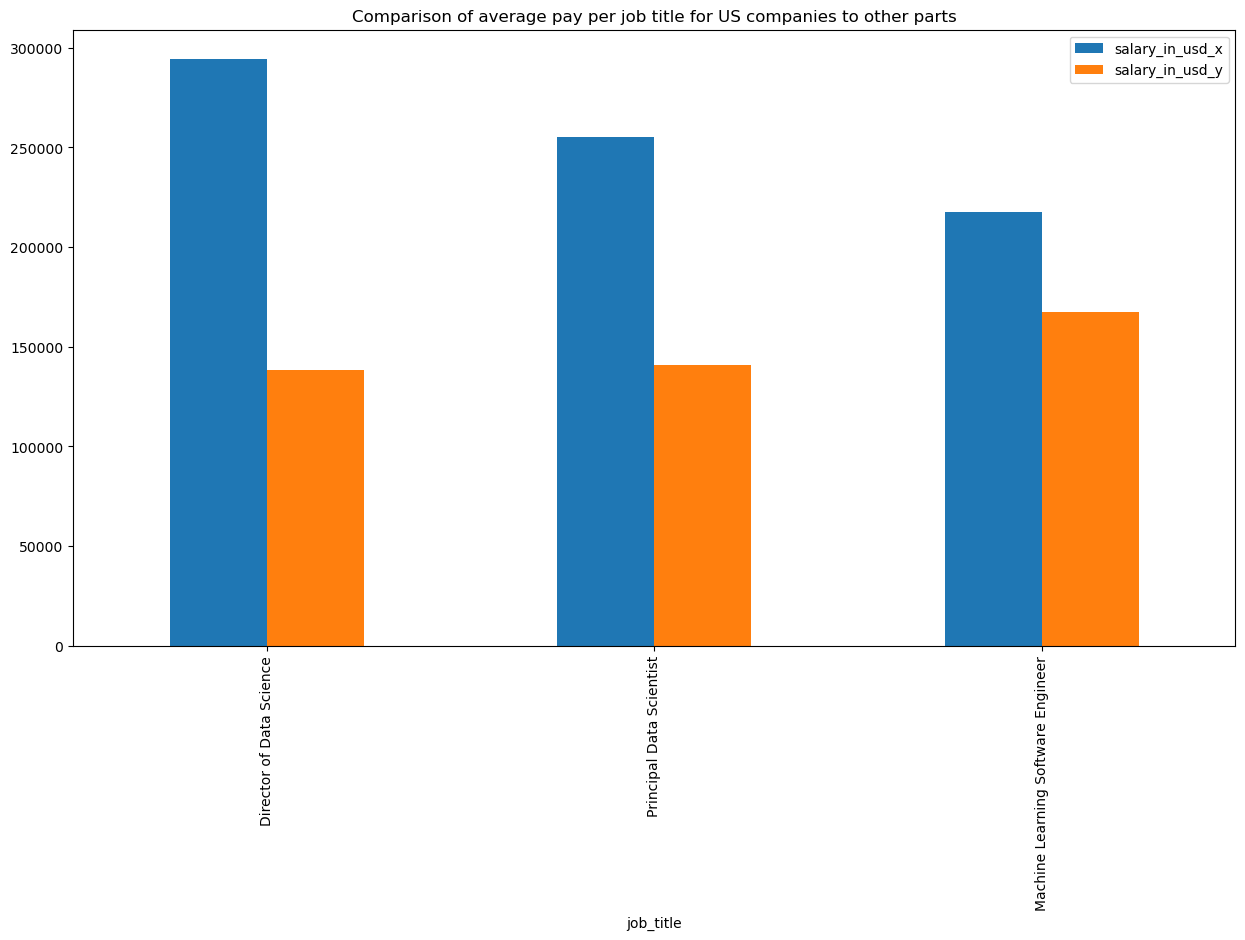

In [32]:
compare.plot(kind='bar',figsize=(15,8),x='job_title',title='Comparison of average pay per job title for US companies to other parts')

In the diagram above, average salaries for US companies are represented by ‘salary_in_usd_x’ and average salaries for other countries are represented by ‘salary_in_usd_y’. From this diagram, we can see that US Companies offer more across the board for all positions, in comparison to other countries.

### 2.salary based on work experience

In [33]:
df['salary_in_usd'].groupby(df['experience_level']) .mean()

experience_level
EN     72648.685185
EX    191078.208333
MI    101828.783133
SE    153897.435650
Name: salary_in_usd, dtype: float64

EN, which refers to Entry-level / Junior.

MI, which refers to Mid-level / Intermediate.

SE, which refers to Senior-level / Expert.

EX, which refers to Executive-level / Director.

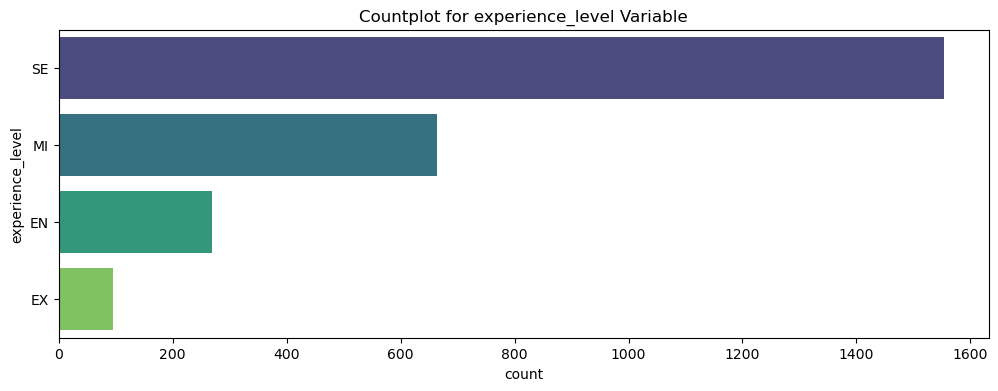

In [34]:
plt.figure(figsize=[12,4])
sns.countplot(y = df['experience_level'],palette='viridis')
plt.title('Countplot for experience_level Variable')
plt.show()

senior level or experts are having most count whereas executive level is having least count

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

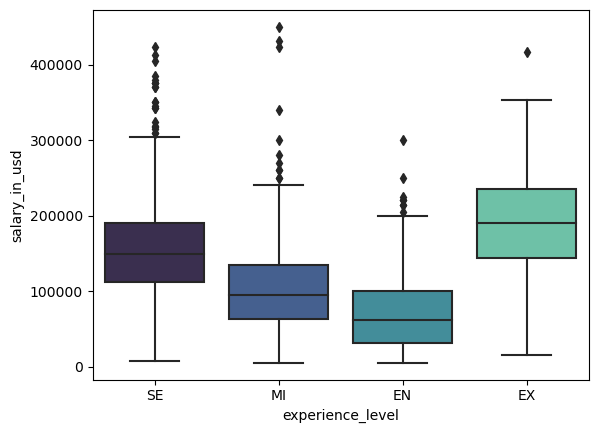

In [35]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df,palette='mako')

Here we can see that executive level employee or director is having largest salary between 300000 to 400000 as we can see some outliers in some cases salary has gone above 400000,followed by senior level with abg salary about 300000 but also increases and reaches 400000 and above,entry level or juniors is having least salary around 250000 can go till 300000 

### 3.Salaries based on Employment Type

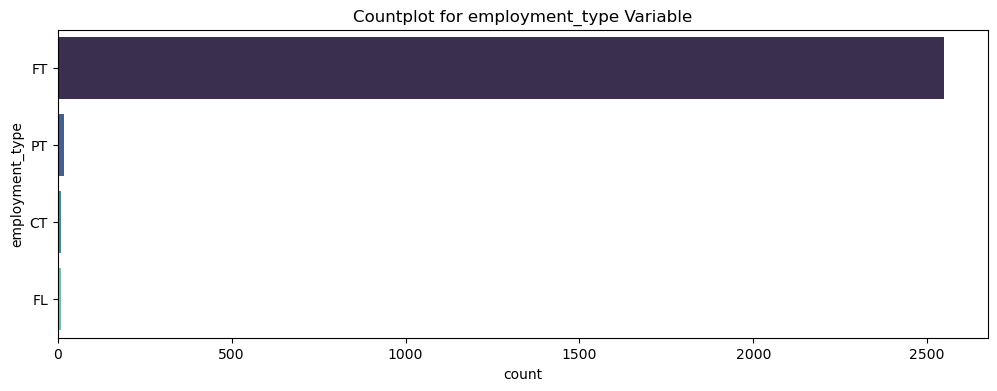

In [36]:
plt.figure(figsize=[12,4])
sns.countplot(y = df['employment_type'],order = df['employment_type'].value_counts().index,palette='mako')
plt.title('Countplot for employment_type Variable')
plt.show()

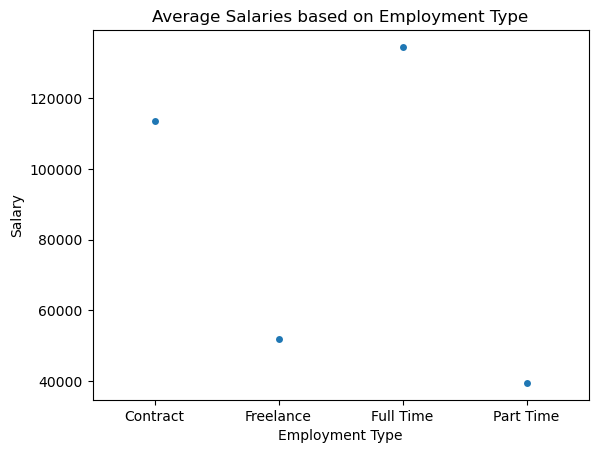

In [37]:
employ_wise_salary=np.array(df['salary_in_usd'].groupby(df['employment_type']) .mean())
plt.title("Average Salaries based on Employment Type")
plt.xlabel('Employment Type')
plt.ylabel('Salary')
sns.stripplot(x=['Contract', 'Freelance', 'Full Time', 'Part Time'],y=employ_wise_salary)
plt.show()

Full time employees have largest salary followed by contractual employee and part time employees have leat salary

### 4.Salaries based on company size

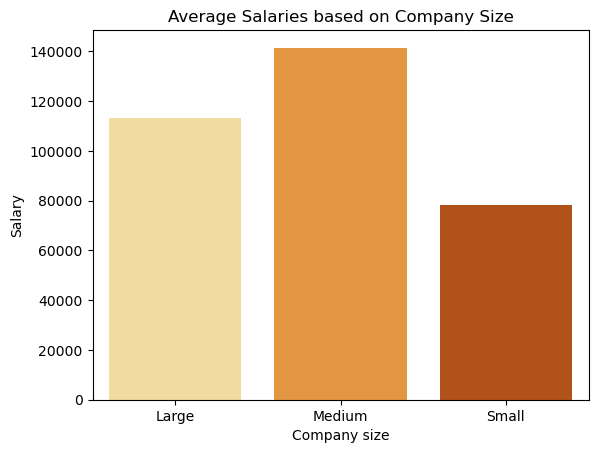

In [38]:
df['salary_in_usd'].groupby(df['work_year']) .mean()
compsize_based_salary=np.array(df['salary_in_usd'].groupby(df['company_size']) .mean())
compsize_based_title=['Large', 'Medium', 'Small']
plt.title("Average Salaries based on Company Size")
plt.xlabel('Company size')
plt.ylabel('Salary')
sns.barplot(x=compsize_based_title,y=compsize_based_salary,palette='YlOrBr')
plt.show()

It shows that medium comapny size is offering the highest salary followd by large and then small

In [39]:
#average pay by company size in the US
compsizeUS=df[df.company_location=='US']
compsizeUS=compsizeUS.groupby('company_size').mean()['salary_in_usd'].reset_index()
compsizeUS=compsizeUS.sort_values('salary_in_usd',ascending=False)
compsizeUS

/tmp/ipykernel_32/985245775.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,company_size,salary_in_usd
1,M,153984.837560
0,L,151464.422727
2,S,105847.339623


In [40]:
#average pay by company size outside the US
compsizeNOTUS=df[df.company_location!='US']
compsizeNOTUS=compsizeNOTUS.groupby('company_size').mean()['salary_in_usd'].reset_index()
compsizeNOTUS=compsizeNOTUS.sort_values('salary_in_usd',ascending=False)
compsizeNOTUS

/tmp/ipykernel_32/1648329439.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,company_size,salary_in_usd
1,M,85783.397849
0,L,68664.248677
2,S,62868.510638


In [41]:
sizecomp = pd.merge(compsizeUS,compsizeNOTUS[['company_size','salary_in_usd']],on='company_size', how='left')
sizecomp

,company_size,salary_in_usd_x,salary_in_usd_y
0,M,153984.837560,85783.397849
1,L,151464.422727,68664.248677
2,S,105847.339623,62868.510638


<Axes: title={'center': 'Comparison of average pay per company_size for US companies to other parts'}, xlabel='company_size'>

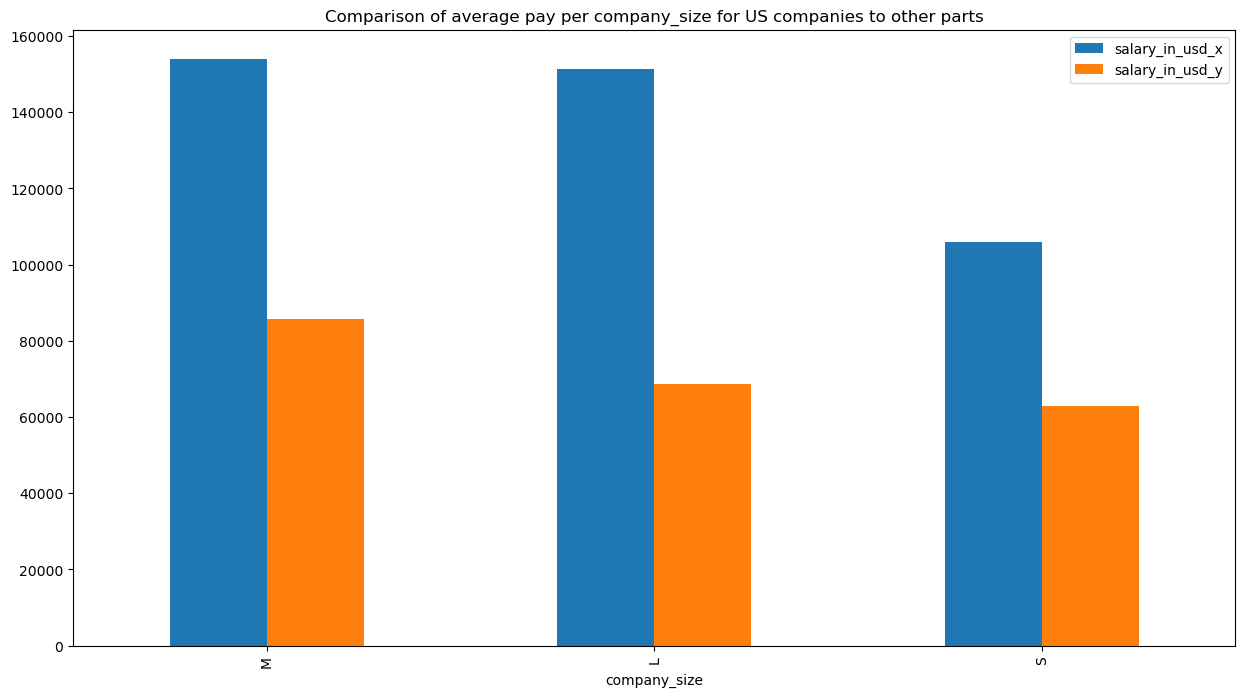

In [42]:
sizecomp.plot(kind='bar',figsize=(15,8),x='company_size',title='Comparison of average pay per company_size for US companies to other parts')

Size of a company has a significant impact on salary, both in the US and in other regions.
Large companies pay more than small companies naturally. However, small companies in the US pay far better than large companies in other parts of the world.
Average pay is much higher in the US for the same position in other countries.

### 5 Salaries based on work year

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

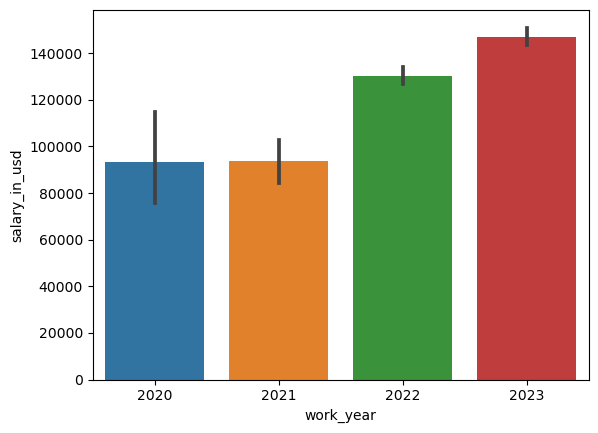

In [43]:
comapany_salary=np.array(df['salary_in_usd'].groupby(df['work_year']) .mean())
sns.barplot(x='work_year', y='salary_in_usd', data=df)

Avg salary for all the job designations seems to be increasing from 2020 to 2023 which shows that demand for this jobs are relatively high with increasing salary

### 6.Salaries based on remote ratio

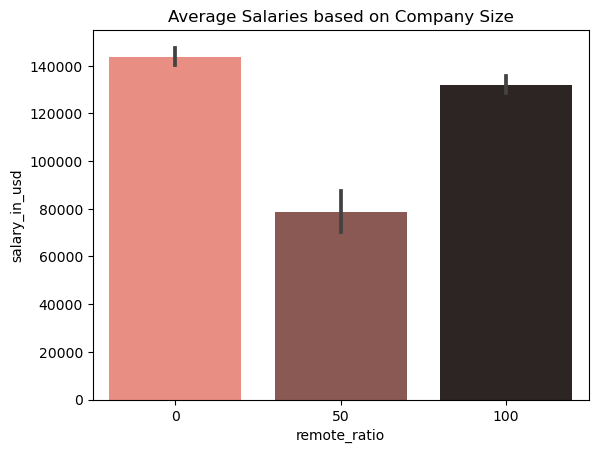

In [44]:
compsize_based_salary=np.array(df['salary_in_usd'].groupby(df['remote_ratio']) .mean())
#compsize_based_title=['Large', 'Medium', 'Small']
plt.title("Average Salaries based on Company Size")
plt.xlabel('Company size')
plt.ylabel('Salary')
sns.barplot(x='remote_ratio',y='salary_in_usd',palette='dark:salmon_r',data=df)
plt.show()

people with 0 or no remote jon i.e people who works physcially in the office tends to have greater salary followed by people with fully remote job

## combined analysis


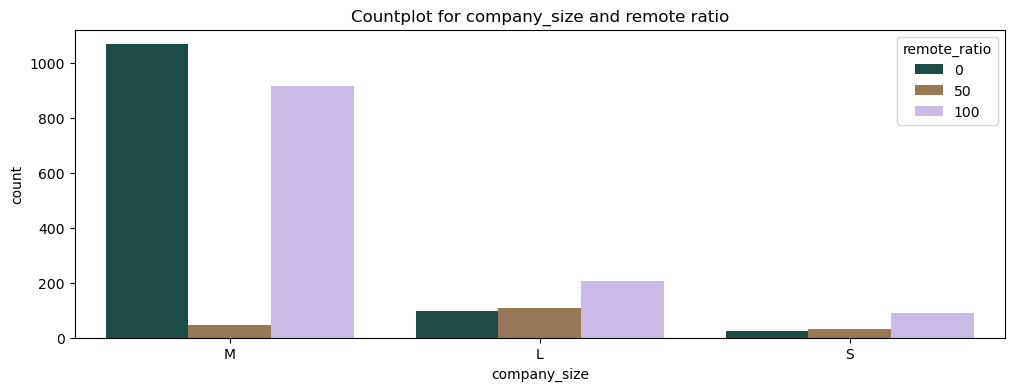

In [45]:
plt.figure(figsize=[12,4])
sns.countplot(x = df['company_size'],hue=df['remote_ratio'],order=df['company_size'].value_counts().index,palette='cubehelix')
plt.title('Countplot for company_size and remote ratio')
plt.show()

In [46]:
df['salary_in_usd'].count()

2584

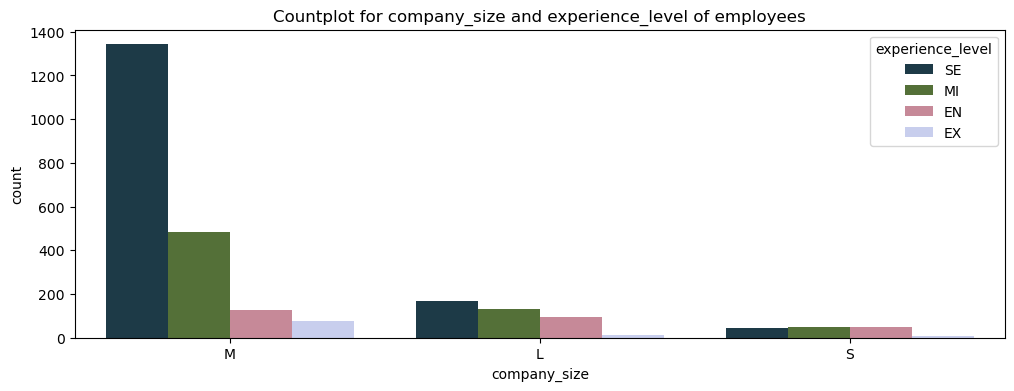

In [47]:
plt.figure(figsize=[12,4])
sns.countplot(x = df['company_size'],hue=df['experience_level'],order=df['company_size'].value_counts().index,palette='cubehelix')
plt.title('Countplot for company_size and experience_level of employees')
plt.show()

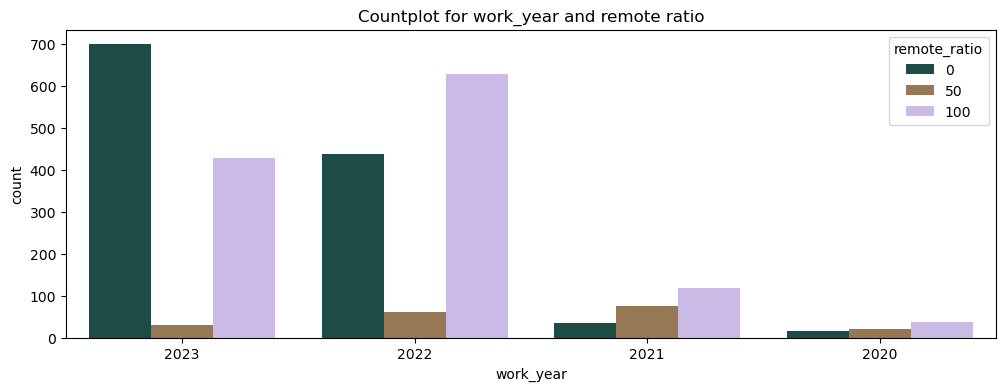

In [48]:
plt.figure(figsize=[12,4])
sns.countplot(x = df['work_year'],hue=df['remote_ratio'],order=df['work_year'].value_counts().index,palette='cubehelix')
plt.title('Countplot for work_year and remote ratio')
plt.show()

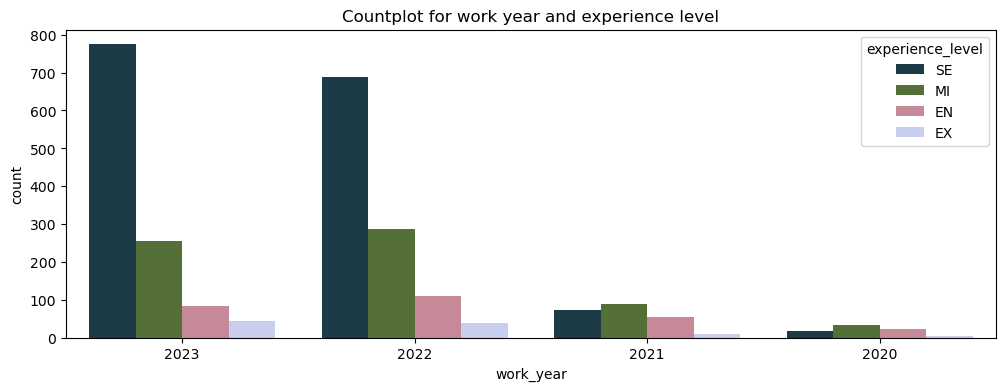

In [49]:
plt.figure(figsize=[12,4])
sns.countplot(x = df['work_year'],hue=df['experience_level'],order=df['work_year'].value_counts().index,palette='cubehelix')
plt.title('Countplot for work year and experience level')
plt.show()